# Cantilever under compression

In [255]:
# the following is a calculation procedure based on Eurocode 3, Python code is combined with the document.
# written by Jiri Mares, 2021
import math
from IPython.display import display, Math, Latex

## Arrangement and Input data

Check the IPE270 column of length 7 m, loaded by axial force of 300 kN for stability. Column is fixed at it's base in plane x-z and pinned in plane x-y. Column top is restrained in movement in y direction (and free in z direction). Steel grade is S235.

Column is loaded by compressed force 'N'. 'N' is permanent loading.

Check if flexural buckling stability of IPE270 is adequate. If not provide a solution.

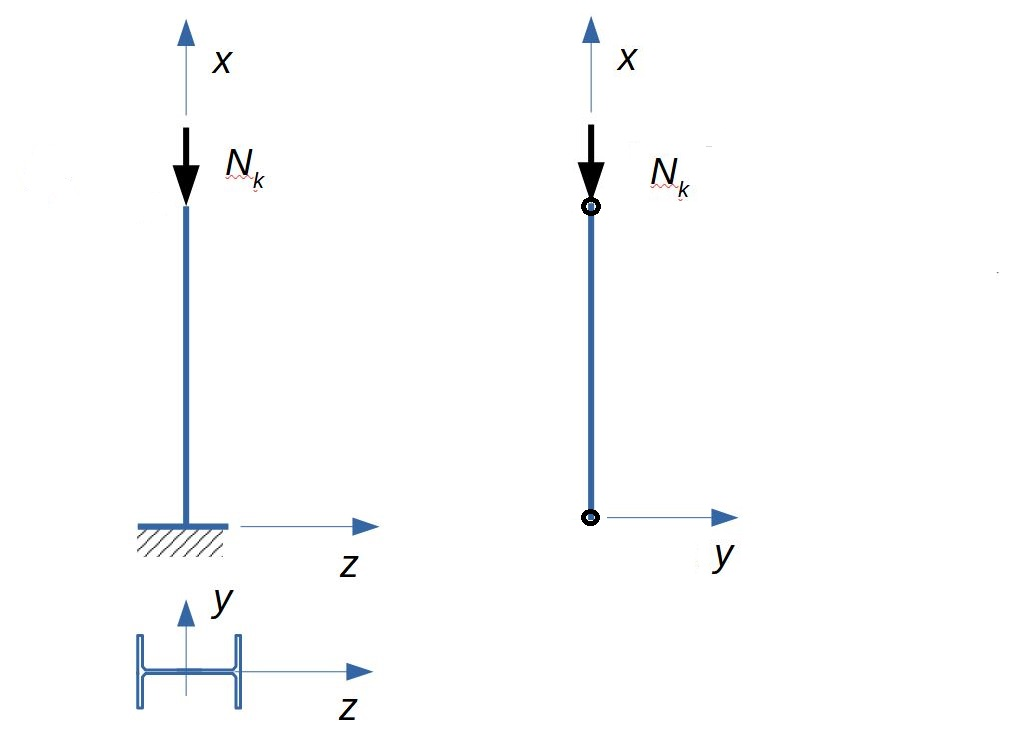

Fig.1 General arrangement and cross sectionclassification

In [256]:
# Length of cantilever [mm]
L = 7000

In [257]:
# Material and partial safety factors
E = 210000 #[MPa]
G = 80000 #[MPa]
fy = 235 #[MPa]
fu = 360 #[MPa]
gamma_M0 = 1.15
gamma_M1 = 1.0
gamma_M2 = 1.3
gamma_G = 1.35
gamma_Q = 1.5

In [258]:
# Permanent Loading
N_GSk = 300 #[kN]

In [259]:
N_GSk = N_GSk * 1000  #[N]
N_Sd = N_GSk * gamma_G

In [260]:
# Buckling lengths
Ly = 2 * L       # buckling perpendicular to the y axis
Lz = L           # buckling perpendicular to the z axis

## Section

In [261]:
# IPE 270
A = 4594 #[mm], cross-sectional area
Iy = 57900000  #[mm^4]
Wy = 429000  #[mm^3]
Iz = 4199000  #[mm^4]
tf = 10.2
tw = 6.6
r = 15 
bf = 135
depth = 270
d = depth - 2 * tf - 2 * r
c = (bf - tw - r) / 2

In [262]:
iy = (Iy / A)**(0.5)
iz = (Iz / A)**(0.5)

In [263]:
print("iy                      = ", ("%2.2f" % (iy) ), "[mm]")
print("iz                      = ", ("%2.2f" % (iz) ), "[mm]")

iy                      =  112.26 [mm]
iz                      =  30.23 [mm]


### Section classification

In [264]:
print("N_Sd                    = ", ("%2.2f" % (N_Sd / 1000) ), "[kN]")
print("d                       = ", ("%2.2f" % (d) ), "[mm]")
print("c                       = ", ("%2.2f" % (c) ), "[mm]")
print("epsilon                 = ", ("%2.2f" % (epsilon) ), "[-]")

N_Sd                    =  405.00 [kN]
d                       =  219.60 [mm]
c                       =  56.70 [mm]
epsilon                 =  1.00 [-]


In [265]:
class_web = 0
# Compressed Internal Part of Section
if(d/tw <= 33*epsilon):
    class_web = 1
elif(d/tw <= 38*epsilon):
    class_web = 2
elif(d/tw <= 42*epsilon):
    class_web = 3
else:
    class_web = 4
    
class_flange = 0
# Compressed Outstand Part of Section
if(c/tf <= 9*epsilon):
    class_flange = 1
elif(c/tf <= 10*epsilon):
    class_flange = 2
elif(c/tf <= 14*epsilon):
    class_flange = 3
else:
    class_flange = 4

In [266]:
print("d / tw                  = ", ("%2.2f" % (d / tw) ), "[-]")
print("Web class               = ", ("%2.2f" % (class_web) ), "[-]")
print("c / tw                  = ", ("%2.2f" % (c / tw) ), "[-]")
print("Flange class            = ", ("%2.2f" % (class_flange) ), "[-]")

d / tw                  =  33.27 [-]
Web class               =  2.00 [-]
c / tw                  =  8.59 [-]
Flange class            =  1.00 [-]


### Member in compression

#### Buckling curve

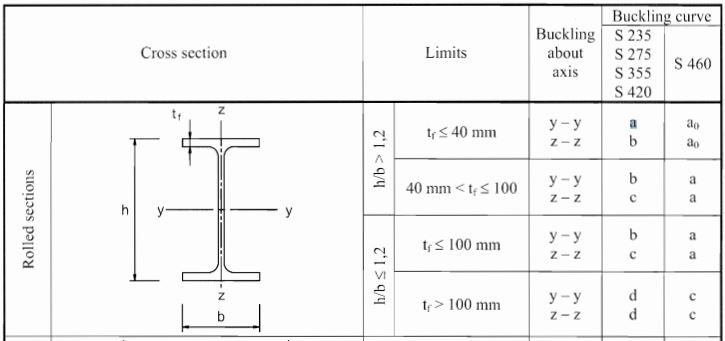

Fig.2 Assignment of buckling curves

In [267]:
# Let's define a subprocedure here, this will be called later on with an argument 'curve' and will returned alpha,
# which is imperfection factor. The imperfection factor is then used when working with buckling curve...
def buckling_curve(curve) : 
    alpha=0.8 
    if curve == "A0":
        alpha=0.13
    if curve == "A":
        alpha=0.21
    if curve == "B":
        alpha=0.34
    if curve == "C":
        alpha=0.49
    if curve == "D":
        alpha=0.76
    return alpha

#### Slenderness for flexural buckling

In [268]:
lambda_y = Ly / iy
lambda_z = Lz / iz
lambda1 = 93.9 * math.sqrt(235/fy)
lambda_dash_y = lambda_y / lambda1
lambda_dash_z = lambda_z / lambda1

In [269]:
print("lambda_y                = ", ("%2.2f" % (lambda_y) ), "[-]")
print("lambda_z                = ", ("%2.2f" % (lambda_z) ), "[-]")
print("lambda1                = ", ("%2.2f" % (lambda1) ), "[-]")
print("lambda_dash_y           = ", ("%2.2f" % (lambda_dash_y) ), "[-]")
print("lambda_dash_z           = ", ("%2.2f" % (lambda_dash_z) ), "[-]")

lambda_y                =  124.71 [-]
lambda_z                =  231.54 [-]
lambda1                =  93.90 [-]
lambda_dash_y           =  1.33 [-]
lambda_dash_z           =  2.47 [-]


#### Imperfection factor

In [270]:
alpha_y = buckling_curve("A")
alpha_z = buckling_curve("B")

In [271]:
print("alpha_y                 = ", ("%2.2f" % (alpha_y) ), "[-]")
print("alpha_z                 = ", ("%2.2f" % (alpha_z) ), "[-]")

alpha_y                 =  0.21 [-]
alpha_z                 =  0.34 [-]


#### Buckling curves

In [272]:
PHI_y = 0.5*(1 + alpha_y *(lambda_dash_y - 0.2) + lambda_dash_y**2)
PHI_z = 0.5*(1 + alpha_z *(lambda_dash_z - 0.2) + lambda_dash_z**2)
chi_y = min(1 / (PHI_y + math.sqrt(PHI_y**2 - lambda_dash_y**2)),1)
chi_z = min(1 / (PHI_z + math.sqrt(PHI_z**2 - lambda_dash_z**2)),1)

In [273]:
print("PHI_y                   = ", ("%2.2f" % (PHI_y) ), "[-]")
print("PHI_z                   = ", ("%2.2f" % (PHI_z) ), "[-]")
print("chi_y                   = ", ("%2.2f" % (chi_y) ), "[-]")
print("chi_z                   = ", ("%2.2f" % (chi_z) ), "[-]")

PHI_y                   =  1.50 [-]
PHI_z                   =  3.93 [-]
chi_y                   =  0.45 [-]
chi_z                   =  0.14 [-]


In [274]:
N_Rk = A * fy
UF1 = N_Sd / (chi_y * N_Rk / gamma_M1 ) 
UF2 = N_Sd / (chi_z * N_Rk / gamma_M1 ) 

In [275]:
print("N_Rk                      = ", ("%2.3f" % (N_Rk/1000)  ), " [kN]")
print("UF1                       = ", ("%2.3f" % UF1), " [-]")
print("UF2                       = ", ("%2.3f" % UF2), " [-]")

N_Rk                      =  1079.590  [kN]
UF1                       =  0.825  [-]
UF2                       =  2.618  [-]


### Conclusion

The above Unity Factor UF2 > 1.0, therefore the desigh FAILs. The second part of the excersize is to propose a solution that would make the design work. A suggested solution may be to add a restraint at the mid-height of the column restraining z direction. The effect would be that the buckling length Lz would become 0.5 * L instead of just L. This will drop the UF2 below zero and make it work.

Note that 300 kN we have considered in our example (30 tons) is about 30 Ford Fiestas!

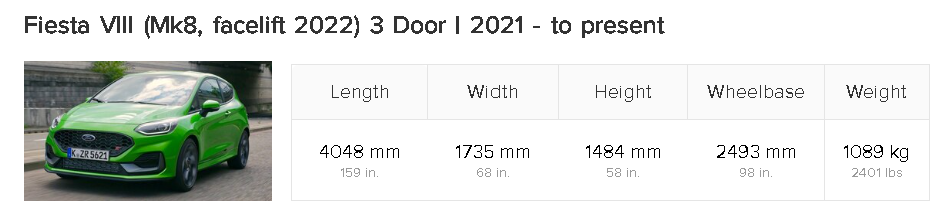

### References

[1] EN 1993-1-3 (2005), Eurocode 3, : Design of steel structures - Part 1-1: General rules and rules for buildings

IF YOU FIND ANY ERRORS PLEASE LET ME KNOW.